In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [27]:
# Define paths to your training and testing data
train_data_dir = '/content/drive/MyDrive/Car_dataset_final/Train'
test_data_dir = '/content/drive/MyDrive/Car_dataset_final/Test'

In [29]:
import os  # Import the os module

# Define constants
img_width, img_height = 224, 224
batch_size = 32
num_epochs = 10
train_data_dir = '/content/drive/MyDrive/Car_dataset_final/Train'  # You need to specify the path to the directory containing your training data
num_classes = len(os.listdir(train_data_dir))


In [30]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [32]:
# Load pre-trained VGG19 model
vgg_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))


In [33]:
# Freeze the layers
for layer in vgg_model.layers:
    layer.trainable = False

In [34]:
# Adding custom layers
x = Flatten()(vgg_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [35]:
# Create final model
model = Model(inputs=vgg_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)


Epoch 1/10
2/2 [==============================] - 84s 64s/step - loss: 21.3217 - accuracy: 0.2500 - val_loss: 29.7899 - val_accuracy: 0.4062
Epoch 2/10
2/2 [==============================] - 47s 31s/step - loss: 20.6389 - accuracy: 0.2969 - val_loss: 1.0476 - val_accuracy: 0.6875
Epoch 3/10
2/2 [==============================] - 48s 31s/step - loss: 4.3700 - accuracy: 0.5625 - val_loss: 11.0878 - val_accuracy: 0.3750
Epoch 4/10
2/2 [==============================] - 53s 36s/step - loss: 6.9967 - accuracy: 0.5781 - val_loss: 7.7622 - val_accuracy: 0.3125
Epoch 5/10
2/2 [==============================] - 53s 37s/step - loss: 3.8635 - accuracy: 0.5938 - val_loss: 1.4817 - val_accuracy: 0.5312
Epoch 6/10
2/2 [==============================] - 53s 37s/step - loss: 1.9634 - accuracy: 0.6250 - val_loss: 3.2888 - val_accuracy: 0.5938
Epoch 7/10
2/2 [==============================] - 48s 32s/step - loss: 2.7453 - accuracy: 0.5781 - val_loss: 1.5001 - val_accuracy: 0.6562
Epoch 8/10
2/2 [=======

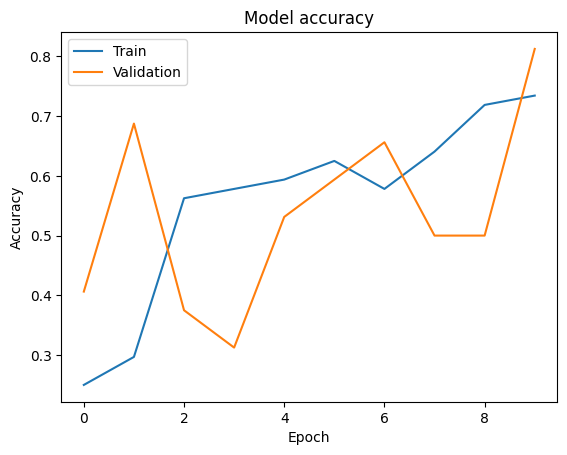

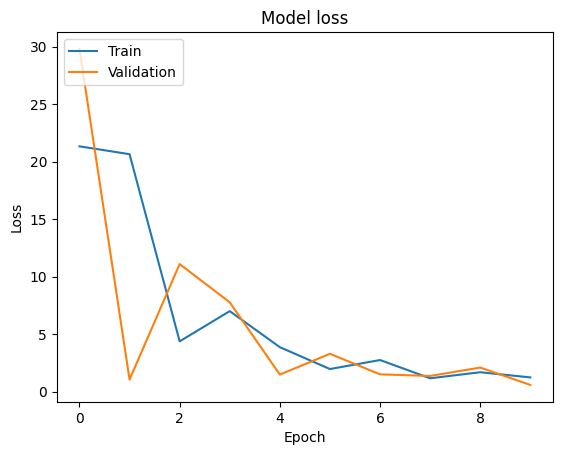

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [38]:
# Save the model
model.save('car_model_identification_vgg19.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
# Evaluate the model
score = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

1/1 [==============================] - 19s 19s/step - loss: 0.3570 - accuracy: 0.8750
Test Loss: 0.3569699823856354
Test Accuracy: 0.875


In [43]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the trained model
model = tf.keras.models.load_model('car_model_identification_vgg19.h5')

# Define the path to the image you want to predict
image_path = '/content/drive/MyDrive/Car_dataset_final/Train/mercedes/17.jpg'

# Load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image

# Make prediction
predictions = model.predict(img_array)

# Get the predicted class label
predicted_class = np.argmax(predictions)

# Get the class labels
class_labels = train_generator.class_indices

# Reverse the dictionary to get the class name from the predicted class label
predicted_class_name = [k for k, v in class_labels.items() if v == predicted_class][0]

print("Predicted class:", predicted_class_name)


1/1 [==============================] - 1s 585ms/step
Predicted class: mercedes
